# Data Visualization

Populating the interactive namespace from numpy and matplotlib


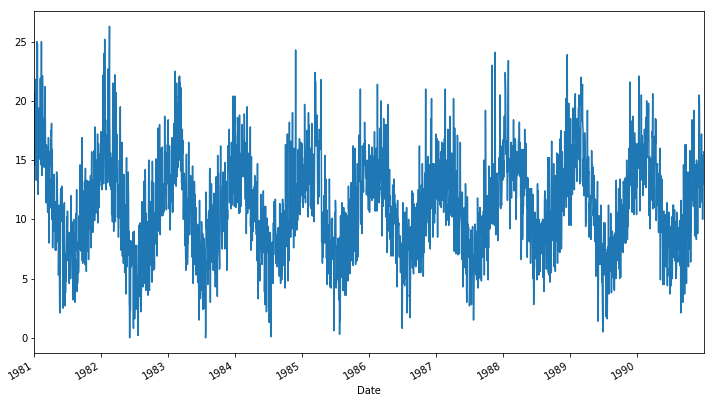

In [41]:
# Line Plot
from pandas import Series
from pandas import read_csv
from matplotlib import pyplot
%pylab inline
pylab.rcParams['figure.figsize'] = (12,7)

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)
series.plot()
pyplot.show()


The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

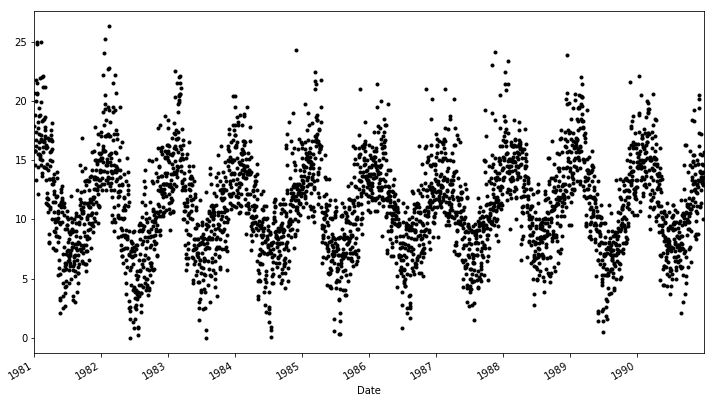

In [42]:
#Dot Plot
from pandas import Series
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)
series.plot(style='k.')
pyplot.show()

### Grouping
It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct compari- son.

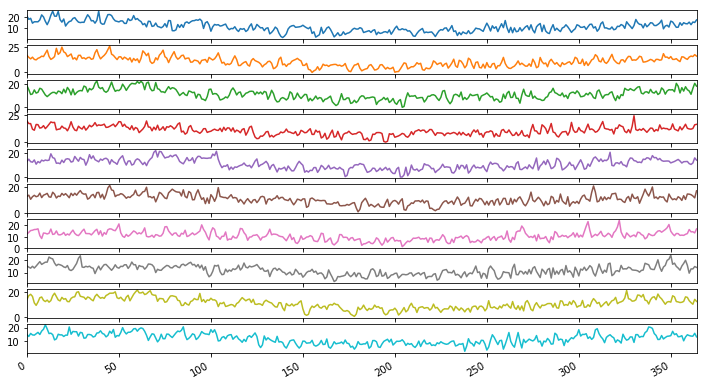

In [46]:
from pandas import read_csv
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot as pt

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend = False)
pyplot.show()

## Histograms and Density Plots

Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

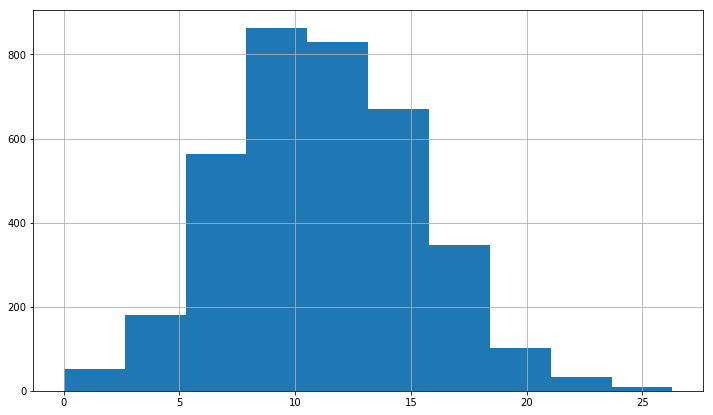

In [47]:
#Histogram
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

series.hist()

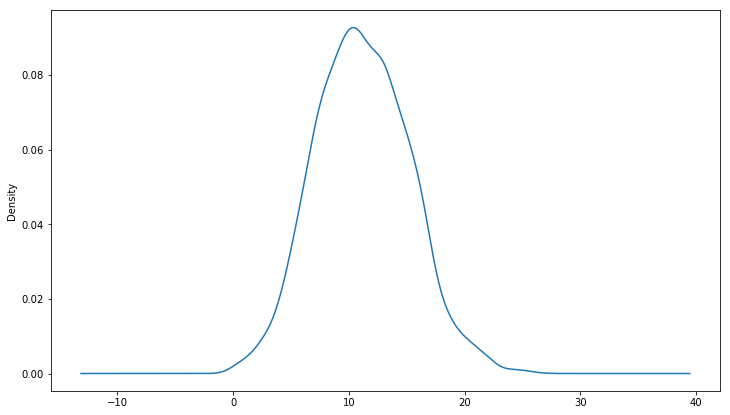

In [49]:
# Density Plot
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

series.plot(kind='kde')
pyplot.show()

## Box and Whisker Plot by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval

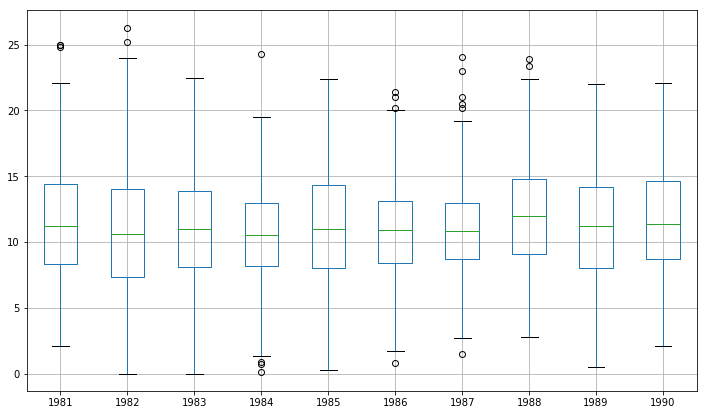

In [50]:
#Box Plot of yearly data
from pandas import read_csv
from pandas import TimeGrouper
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

<function matplotlib.pyplot.show>

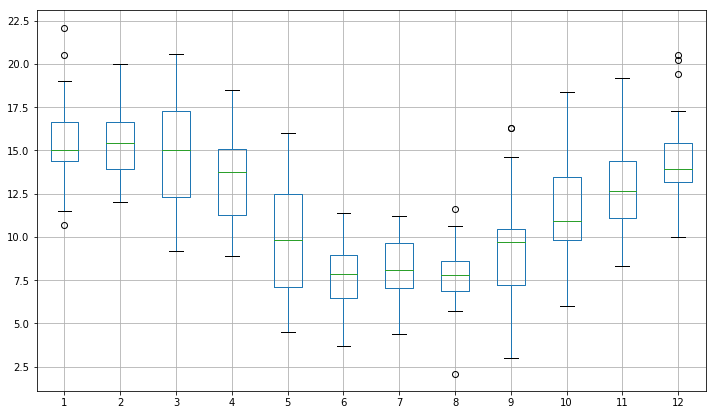

In [55]:
# Boxplot of monthly data
from pandas import read_csv
from pandas import TimeGrouper
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

one_year = series['1990']
groups = one_year.groupby(TimeGrouper("M"))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show

## Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted. Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the Matplotlib library is used as no heatmap support is provided directly in Pandas. For convenience, the matrix is rotated (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

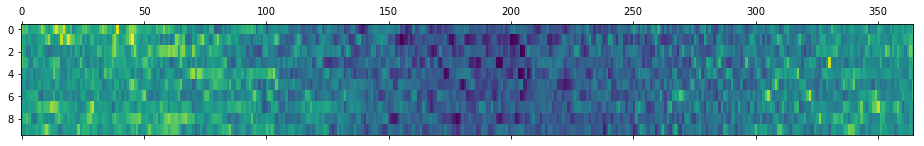

In [56]:
#Create Heat Map
from pandas import read_csv
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
#Transpose df
years= years.T

pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

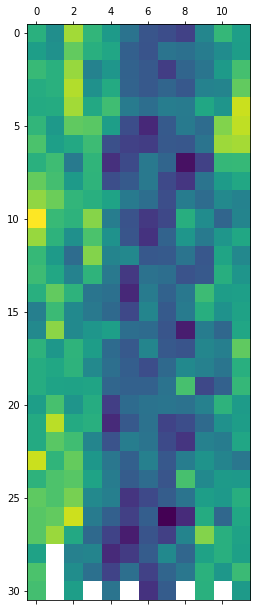

In [58]:
#Heat map by month
from pandas import read_csv
from pandas import TimeGrouper
from pandas import DataFrame
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation = None, aspect='auto')
pyplot.show()


### Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag=2, and so on. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag=1 observation (t-1) on the y-axis.

- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
- Either relationship is good as they can be modeled.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.

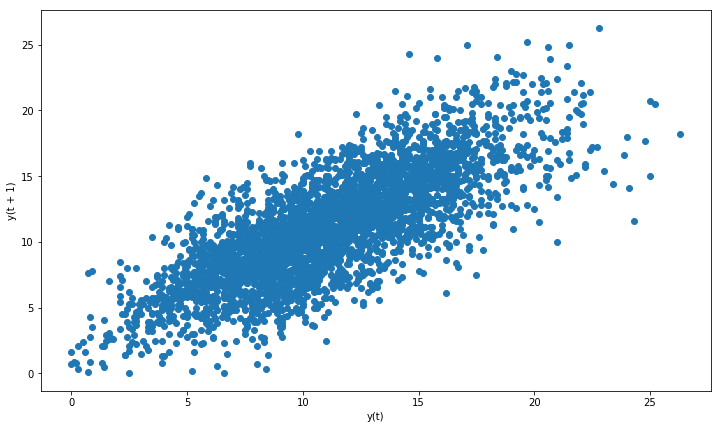

In [59]:
#Scatter Plot
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

lag_plot(series)
pyplot.show()

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore. For example, we can create a scatter plot for the observation with each value in the previous seven days.

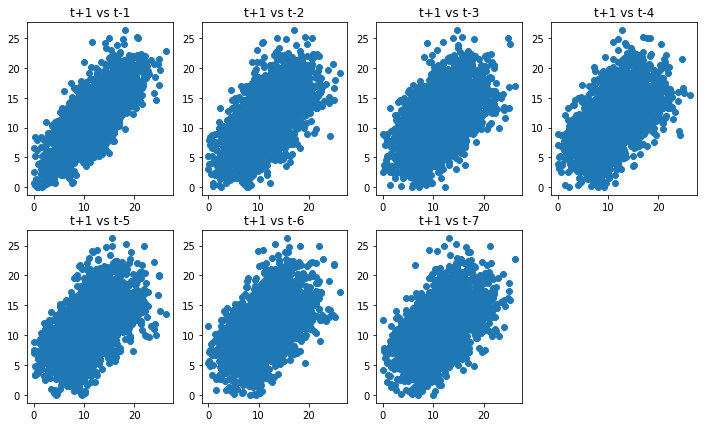

In [61]:
#Create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1, (lags+1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']

for i in range(1, (lags+1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)

for i in range(1, (lags+1)):
    ax = pyplot.subplot(240 +i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-' + str(i)].values)

pyplot.show()
    

Running the example suggests the strongest relationship between an observation with its lag=1 value, but generally a good positive correlation with each value in the last week.


### Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coe cients, can be calculated for each observation and di↵erent lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation plot() function.

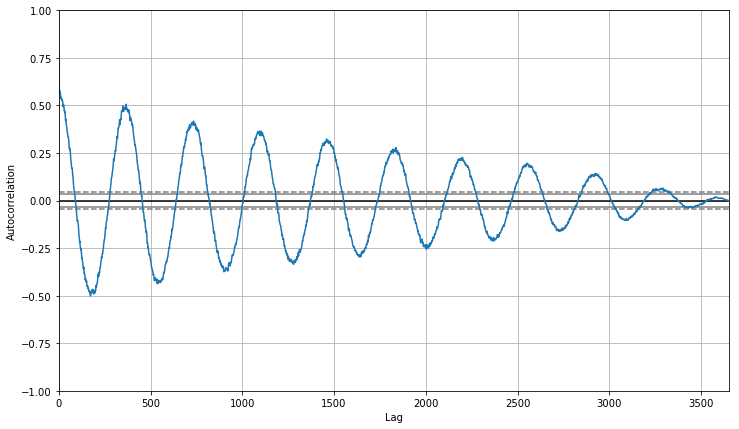

In [62]:
# Autocorrelation Plot

from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

series = read_csv('daily-minimum-temperatures.csv', header = 0, parse_dates=[0],
                   index_col=0, nrows=3650, squeeze=True)
series = series.map(lambda x: x.lstrip('?'))
series = series.astype(float)

autocorrelation_plot(series)
pyplot.show()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen
in this example are a strong sign of seasonality in the dataset.